# Exploring the data

In this notebook, we'll explore the data and get some insights from it

First, let's import the libs and load the data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("test_data.csv", sep=";")

In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
df = df.set_index("id")

In [5]:
df

,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
id,,,,,,,,,,,,,,
589015,BR,mobile_app,1.0,0.0,Other,6,3,2.0,1,0.0,215.0,6.0,0.0,0
589016,BR,mobile_web,2.0,0.0,Google CPC no Brand,6,3,1.0,1,0.0,0.0,44.0,0.0,0
589017,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,16.0,0.0,0
589018,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,15.0,0.0,0
589019,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,24.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181805,AR,desktop,1.0,0.0,Google Organic,1,2,3.0,4,13.0,0.0,93.0,0.0,0
1181806,AR,mobile_web,0.0,0.0,Other,1,2,0.0,0,0.0,0.0,0.0,0.0,0
1181807,BR,desktop,2.0,0.0,partners,1,2,0.0,0,0.0,0.0,25.0,0.0,0


In [6]:
df.describe()

,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
count,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000
mean,1.091154,0.005793,2.725496,13.565886,5.232655,5.198054,1.289987,7.105310,68.441636,0.895406,0.080071
std,0.543782,0.118485,1.937653,7.157861,104.301081,97.490506,9.712947,36.444225,124.612021,12.274338,0.271404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
75%,1.000000,0.000000,4.000000,19.000000,1.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000
max,22.000000,27.000000,6.000000,23.000000,28530.000000,28530.000000,3059.000000,1706.000000,14596.000000,2527.000000,1.000000


After describing the data, we can see there is no missing value, which is a good thing.

There are also some text columns. We need to transform to numbers (categories)

Now, let's plot the correlation matrix and analyse which features impacts on the `target` column

In [7]:
country_index = list(df["country"].unique())
platform_index = list(df["creation_platform"].unique())
source_index = list(df["source_pulido"].unique())

In [8]:
df_num_values = df.drop(["country", "creation_platform", "source_pulido"], axis=1)
df_num_values["country_index"] = df["country"].apply(lambda i: country_index.index(i))
df_num_values["creation_platform_index"] = df["creation_platform"].apply(lambda i: platform_index.index(i))
df_num_values["source_pulido_index"] = df["source_pulido"].apply(lambda i: source_index.index(i))

In [9]:
df_num_values

,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target,country_index,creation_platform_index,source_pulido_index
id,,,,,,,,,,,,,,
589015,1.0,0.0,6,3,2.0,1,0.0,215.0,6.0,0.0,0,0,0,0
589016,2.0,0.0,6,3,1.0,1,0.0,0.0,44.0,0.0,0,0,1,1
589017,1.0,0.0,6,3,0.0,0,0.0,0.0,16.0,0.0,0,0,1,1
589018,1.0,0.0,6,3,0.0,0,0.0,0.0,15.0,0.0,0,0,1,1
589019,1.0,0.0,6,3,0.0,0,0.0,0.0,24.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181805,1.0,0.0,1,2,3.0,4,13.0,0.0,93.0,0.0,0,1,2,5
1181806,0.0,0.0,1,2,0.0,0,0.0,0.0,0.0,0.0,0,1,1,0
1181807,2.0,0.0,1,2,0.0,0,0.0,0.0,25.0,0.0,0,0,2,8


In [10]:
df_num_values.corr()

,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target,country_index,creation_platform_index,source_pulido_index
admin_visits,1.000000,0.042529,-0.031649,0.164126,0.050142,0.053220,0.142762,0.106149,0.437376,0.074885,0.269528,0.068581,0.133398,0.126140
intercom_conversations,0.042529,1.000000,-0.006773,0.005528,0.015288,0.016969,0.028588,0.017543,0.061377,0.006031,0.061440,0.001348,0.020999,0.009063
creation_weekday,-0.031649,-0.006773,1.000000,-0.026759,-0.000393,-0.001671,-0.006821,0.013592,-0.014844,-0.000401,-0.026152,-0.012190,-0.066965,-0.020446
creation_hour,0.164126,0.005528,-0.026759,1.000000,0.004577,0.005270,0.013806,-0.019366,0.026333,-0.000566,0.038426,0.007672,0.116203,0.031829
products_with_description,0.050142,0.015288,-0.000393,0.004577,1.000000,0.864969,0.214250,0.009553,0.120426,0.008602,0.039452,0.010846,0.030643,0.015919
total_products_with_images,0.053220,0.016969,-0.001671,0.005270,0.864969,1.000000,0.121709,0.015239,0.095368,0.017177,0.043820,0.014010,0.029929,0.014234
total_product_categories,0.142762,0.028588,-0.006821,0.013806,0.214250,0.121709,1.000000,0.014254,0.325079,0.030273,0.124858,0.022784,0.084163,0.044906
total_events_on_Android,0.106149,0.017543,0.013592,-0.019366,0.009553,0.015239,0.014254,1.000000,0.055815,-0.007887,0.012824,-0.018463,-0.287187,-0.125776
total_events_on_Web,0.437376,0.061377,-0.014844,0.026333,0.120426,0.095368,0.325079,0.055815,1.000000,0.108248,0.353851,0.068053,0.210879,0.142467
total_events_on_iOS,0.074885,0.006031,-0.000401,-0.000566,0.008602,0.017177,0.030273,-0.007887,0.108248,1.000000,0.063543,0.013648,0.009107,0.020430


<Axes: >

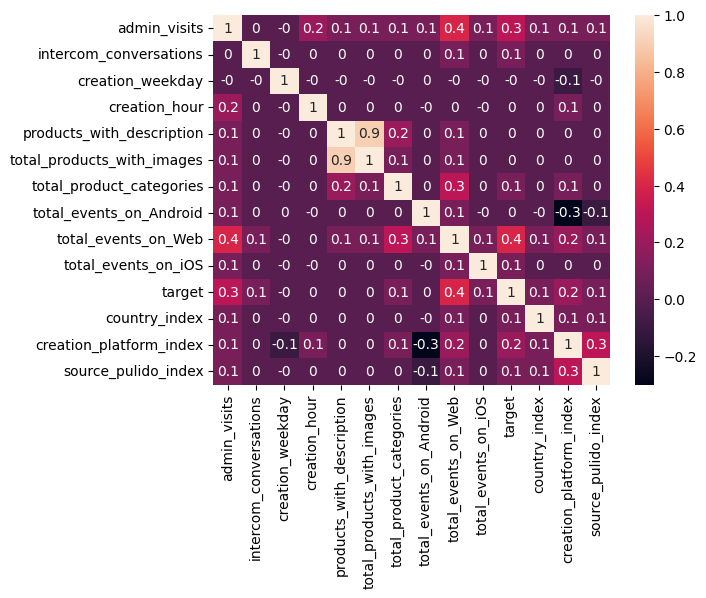

In [11]:
# Rounding values to 1 decimal to improve visualization due too many features
sns.heatmap(df_num_values.corr().round(1), annot=True)

As we can see, the features that have most impact on the `target` are:
 - `total_events_on_web` (0.4)
 - `admin_visits` (0.3)
 
Now let's describe the dataframe values separeted by target

In [12]:
df_positive = df_num_values[df_num_values["target"] == 1]
df_negative = df_num_values[df_num_values["target"] == 0]

In [13]:
df_positive.describe()

,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target,country_index,creation_platform_index,source_pulido_index
count,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.000000,46869.0,46869.000000,46869.000000,46869.000000
mean,1.587937,0.030468,2.553735,14.498154,19.180034,19.678252,5.400585,8.689454,217.899166,3.539056,1.0,0.532804,1.833387,4.299345
std,0.547770,0.308706,1.883570,6.684675,156.147910,160.127438,16.640698,48.339628,247.388980,28.252915,0.0,0.618945,0.421329,2.517779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,1.0,0.000000,2.000000,3.000000
50%,2.000000,0.000000,2.000000,16.000000,1.000000,2.000000,1.000000,0.000000,155.000000,0.000000,1.0,0.000000,2.000000,4.000000
75%,2.000000,0.000000,4.000000,19.000000,7.000000,9.000000,6.000000,0.000000,298.000000,0.000000,1.0,1.000000,2.000000,6.000000
max,22.000000,27.000000,6.000000,23.000000,9867.000000,10746.000000,1238.000000,1513.000000,14596.000000,2527.000000,1.0,4.000000,3.000000,10.000000


In [14]:
df_negative.describe()

,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target,country_index,creation_platform_index,source_pulido_index
count,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.000000,538471.0,538471.000000,538471.000000,538471.000000
mean,1.047913,0.003646,2.740447,13.484741,4.018662,3.937685,0.932197,6.967424,55.432718,0.665300,0.0,0.360434,1.396268,3.133183
std,0.521508,0.083115,1.941572,7.191867,98.412397,89.889255,8.766521,35.215965,97.156128,9.676498,0.0,0.641666,0.630084,2.524127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.0,0.000000,1.000000,1.000000
50%,1.000000,0.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.0,0.000000,1.000000,3.000000
75%,1.000000,0.000000,4.000000,19.000000,1.000000,1.000000,0.000000,0.000000,57.000000,0.000000,0.0,1.000000,2.000000,5.000000
max,7.000000,25.000000,6.000000,23.000000,28530.000000,28530.000000,3059.000000,1706.000000,7515.000000,1050.000000,0.0,4.000000,3.000000,11.000000


Unfortunately, the distribution of the `total_events_on_web` and `admin_vists` are too similar between the positive and negative target.

This means that we can't easly separe the customer by these values. So, to discover which customer is going to continue to use the platform will not be an easy task.

Let's check if the data is balanced, if the amount of negative targets is close the the positive ones.

In [16]:
df_num_values["target"].value_counts()

target
0    538471
1     46869
Name: count, dtype: int64

There are almost 500.000 more negative records than positive. This means the data is not balanced.

This will be treated while developing the models